In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Question 1

In [2]:
# hyper parameters
pi = 0.7
a = 0.6

In [28]:
def generate_data(num_samples: int, pi: float, a: float):
    is_group_a = np.random.binomial(1, pi, num_samples)

    landed_on_a = np.random.binomial(1, a, num_samples)

    say_yes = np.logical_and(is_group_a, landed_on_a)
    say_yes = np.logical_or(say_yes, 
    np.logical_and(np.logical_not(is_group_a), np.logical_not(landed_on_a))).astype(int)

    return say_yes

generate_data(100, pi, a)

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1])

In [84]:
data = generate_data(5000, pi, a)

In [85]:
def log_likelihood(data: np.ndarray, pi: float, a: float):
    m = np.sum(data)

    return m * np.log(a*pi + (1-a)*(1-pi)) + (len(data) - m) * np.log((1-a) * pi + a * (1 - pi))

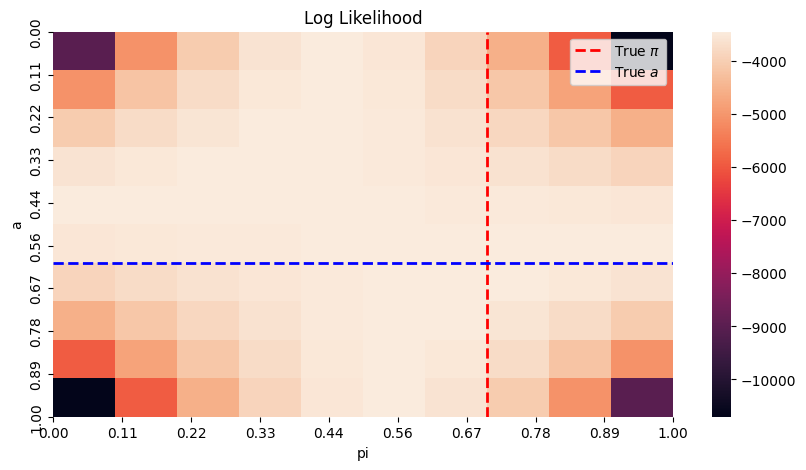

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

N = 10
log_likelihoods = np.zeros((N, N))

for i, x in enumerate(np.linspace(0.01, 0.99, N)):
    for j, y in enumerate(np.linspace(0.01, 0.99, N)):
        # print(log_likelihood(data, x, y))
        log_likelihoods[i, j] = log_likelihood(data, x, y)

sns.heatmap(log_likelihoods, ax=ax)
ax.set_xlabel('pi')
ax.set_ylabel('a')

_N = 10
ax.set_xticks(np.linspace(0, N, _N))
ax.set_xticklabels([f"{x:.2f}" for x in np.linspace(0, 1, _N)])

ax.set_yticks(np.linspace(0, N, _N))
ax.set_yticklabels([f"{x:.2f}" for x in np.linspace(0, 1, _N)])

ax.set_title('Log Likelihood')

# Display the true pi and a as lines on the heatmap
# pi: vertical line, a: horizontal line

ax.axvline(pi * N, color='red', linestyle='--', linewidth=2, label='True $\\pi$')
ax.axhline(a * N, color='blue', linestyle='--', linewidth=2, label='True $a$')



ax.legend()

Estimator of $\pi_{ML}$

In [103]:
def estimate_pi_ml(data: np.ndarray, a: float):
    m = np.sum(data)

    return (a - 1.0 + (m/len(data))) * (1.0/(2.0 * a - 1.0))

In [104]:
pi_ml = estimate_pi_ml(data, a)
pi_ml, pi

(np.float64(0.717), 0.7)

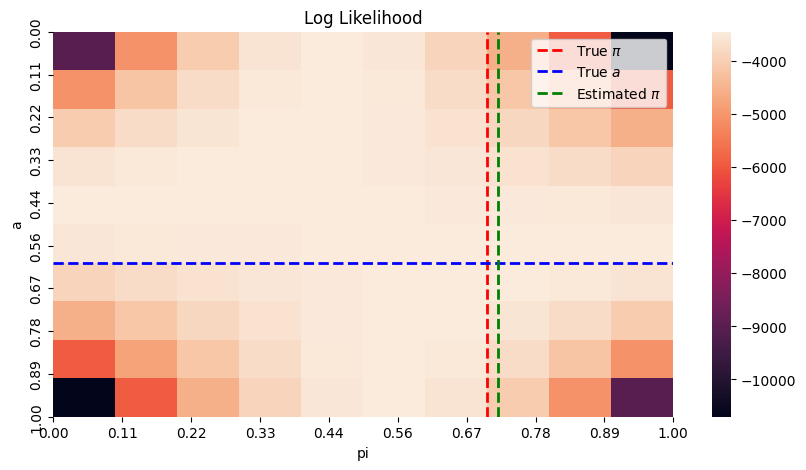

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

N = 10
log_likelihoods = np.zeros((N, N))

for i, x in enumerate(np.linspace(0.01, 0.99, N)):
    for j, y in enumerate(np.linspace(0.01, 0.99, N)):
        # print(log_likelihood(data, x, y))
        log_likelihoods[i, j] = log_likelihood(data, x, y)

sns.heatmap(log_likelihoods, ax=ax)
ax.set_xlabel('pi')
ax.set_ylabel('a')

_N = 10
ax.set_xticks(np.linspace(0, N, _N))
ax.set_xticklabels([f"{x:.2f}" for x in np.linspace(0, 1, _N)])

ax.set_yticks(np.linspace(0, N, _N))
ax.set_yticklabels([f"{x:.2f}" for x in np.linspace(0, 1, _N)])

ax.set_title('Log Likelihood')

# Display the true pi and a as lines on the heatmap
# pi: vertical line, a: horizontal line

ax.axvline(pi * N, color='red', linestyle='--', linewidth=2, label='True $\\pi$')
ax.axhline(a * N, color='blue', linestyle='--', linewidth=2, label='True $a$')

ax.axvline(pi_ml * N, color='green', linestyle='--', linewidth=2, label='Estimated $\\pi$')


ax.legend()

In [120]:
# multiple runs

num_runs = 100
pi = 0.7
a = 0.6

def run_simulation(num_runs: int, pi: float, a: float):
    estimates = []

    N = 100
    log_likelihoods = np.zeros((num_runs, N))

    for run in tqdm(range(num_runs), desc="Running Monte Carlo Simulations", unit="runs", total=num_runs):
        np.random.seed(run)
        data = generate_data(5000, pi, a)
        pi_ml = estimate_pi_ml(data, a)

        estimates.append(pi_ml)


        # log_likelihoods = np.zeros((N))
        for i, x in enumerate(np.linspace(0.01, 0.99, N)):
            log_likelihoods[run, i] = log_likelihood(data, x, a)

    estimates = np.array(estimates)

    mean_estimate = np.mean(estimates)
    std_estimate = np.std(estimates)

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))

    log_likelihood_std = log_likelihoods.std(axis=0)
    log_likelihoods = log_likelihoods.mean(axis=0)
    ax.plot(np.linspace(0.01, 0.99, N), log_likelihoods)
    ax.fill_between(np.linspace(0.01, 0.99, N), log_likelihoods-log_likelihood_std, log_likelihoods+log_likelihood_std, alpha=0.2, label='Std Log Likelihood')

    ax.axvline(pi, color='red', linestyle='--', linewidth=2, label='True $\\pi$')
    ax.axvline(mean_estimate, color='green', linestyle='--', linewidth=2, label='$\\pi_{ML}$')
    ax.axvline(mean_estimate+std_estimate, color='blue', linestyle='--', linewidth=2, label='$\\pi_{ML} + \\sigma$')
    ax.axvline(mean_estimate-std_estimate, color='blue', linestyle='--', linewidth=2, label='$\\pi_{ML} - \\sigma$')

    ax.grid(True)
    ax.legend()

    ax.set_xlabel('$\\pi$')
    ax.set_ylabel('Log Likelihood')


In [122]:
import ipywidgets as widgets
from ipywidgets import interact

def interactive_run_simulation():
    pi_slider = widgets.FloatSlider(value=0.7, min=0.01, max=0.99, step=0.01, description='pi:')
    a_slider = widgets.FloatSlider(value=0.6, min=0.01, max=0.99, step=0.01, description='a:')
    num_runs_slider = widgets.IntSlider(value=100, min=10, max=500, step=10, description='num_runs:')

    @interact(pi=pi_slider, a=a_slider, num_runs=num_runs_slider)
    def run(pi, a, num_runs):
        run_simulation(num_runs, pi, a)

# To use, just call:
interactive_run_simulation()


interactive(children=(FloatSlider(value=0.7, description='pi:', max=0.99, min=0.01, step=0.01), FloatSlider(va…

## Variance estimator

In [2]:
def variance_estimator(pi: float, a: float, n: int):
    return ((pi - pi ** 2)/n) + (a - a**2)/(((2*a - 1)**2)*n) 

In [4]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def plot_variance_heatmap(a_min=0.01, a_max=0.99, pi_min=0.01, pi_max=0.99, n_val=50, res=20, use_log=False):
    a_vals = np.linspace(a_min, a_max, res)
    pi_vals = np.linspace(pi_min, pi_max, res)
    A, PI = np.meshgrid(a_vals, pi_vals)
    N = n_val

    VAR = variance_estimator(PI, A, N)
    display_VAR = np.copy(VAR)
    if use_log:
        display_VAR = np.log10(VAR + 1e-10)
        # display_VAR = np.log10(VAR + 1e-10)

    fig, ax = plt.subplots(figsize=(10, 8))
    c = ax.imshow(display_VAR, cmap="plasma", origin="lower",
                  extent=[a_min, a_max, pi_min, pi_max],
                  aspect='auto')

    # Display the values on the cells
    for i in range(res):
        for j in range(res):
            val = display_VAR[i, j]
            if use_log:
                text = f"{val:.2g}"
            else:
                text = f"{VAR[i, j]:.1e}"
            C = 0.95
            ax.text(a_vals[j]*C + 0.025, pi_vals[i]*C+0.025, text, ha="center", va="center", color="white", fontsize=8, fontweight='bold')

    ax.set_xlabel('$a$')
    ax.set_ylabel('$\\pi$')
    zlabel = '$\\log_{10}$ Variance' if use_log else 'Variance $\\mathbb{V}[\\pi_{ML}]$'
    ax.set_title(f'Variance as function of $a$ and $\\pi$ (n={N})')
    fig.colorbar(c, ax=ax, label=zlabel)
    plt.tight_layout()
    plt.show()

def plot_variance_heatmap_with_n(a_min=0.01, a_max=0.99, pi_min=0.01, pi_max=0.99, n_min=1, n_max=100, res=20):
    @interact(n=(n_min, n_max, 1), use_log=True)
    def interactive_plot(n=50, use_log=False):
        plot_variance_heatmap(a_min, a_max, pi_min, pi_max, n_val=n, res=res, use_log=use_log)

plot_variance_heatmap_with_n(n_max=1000)



interactive(children=(IntSlider(value=50, description='n', max=1000, min=1), Checkbox(value=True, description=…